#### Aim of the project is to predict if a patient will live or die using the parameters

In [1]:
import pickle

In [2]:
# Importing EDA packages
import numpy as np
import pandas as pd

In [3]:
# Importing data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Loading our dataset
df = pd.read_csv('data/hepatitis.data')

In [5]:
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


As we see there are no column names in this data, we will this information from hepatitis.name

In [6]:
# Getting columns names
col_names = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", 
             "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", 
             "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY"]

In [7]:
# Adding colum names to the dataset:
df = pd.read_csv('data/hepatitis.data', names=col_names)

In [8]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [9]:
# Cleaning our column names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [10]:
# Converting column names to lower case
df.columns.str.lower().str.replace(' ', '_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [13]:
# Replace the ?(we have some in protime feature) with 0 in the dataset

df = df.replace('?', 0)

In [14]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [15]:
# Checking datatypes
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [16]:
# Checking how many columns are of object type:
sum(df.dtypes == 'object')

15

In [17]:
# Features which are of object type are :
object_features = df.columns[df.dtypes == 'object']
object_features

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [18]:
# Casting object types to integer type
# we wont convert bilirubin and albumin to int as they are float type
for feature in object_features:
    if feature == 'bilirubin' or feature == 'albumin':
        continue
    df[feature] = df[feature].astype('int64')

In [19]:
# Now converting albumin and bilirubin to float:
for f in ['bilirubin', 'albumin']:
    df[f] = df[f].astype(float)

In [20]:
# Now finally checking our DataTypes:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [21]:
# Checking count of each feature:
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [22]:
# The shape of the dataset
df.shape

(155, 20)

In [23]:
# Checking for missing values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [24]:
# saving the clean data to the Web App location

df.to_csv(r"Hepatitis App/data/clean_hepatitis_dataset.csv", header=True, index=False)

### EDA

In [25]:
# Basic description of the dataset
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [26]:
# CLASS FEATURE

target_label = {
    'Die': 1,
    'Live': 2
}

In [27]:
# Value Counts of dependent feature
df['class'].value_counts()
# 1 is Die, 2 is Live

2    123
1     32
Name: class, dtype: int64

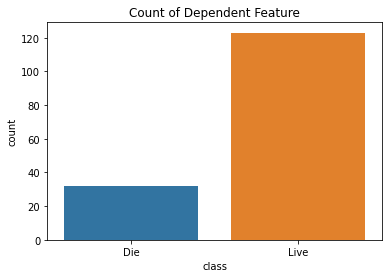

In [28]:
# Plotting the count of dependent feature
plt.figure()
sns.countplot(x='class', data=df)
plt.xticks(ticks=[0, 1], labels=['Die', 'Live'])
plt.title("Count of Dependent Feature");

In [29]:
# GENDER FEATURE

# How many are Male(1) and Female(2)
df['sex'].unique()

array([2, 1], dtype=int64)

In [30]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

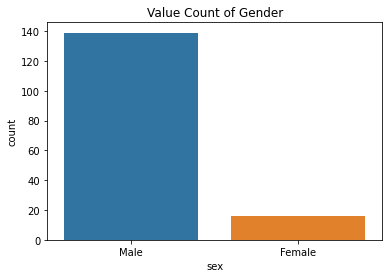

In [31]:
# Plotting the Sex feature
plt.figure()
sns.countplot(x='sex', data=df)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.title("Value Count of Gender");

Conclusion - There are more males than females in our dataset

In [32]:
# AGE FEATURE

# Finding Age range
df.groupby(['age', 'sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

This is not that much informative, we will try something else

In [33]:
# Frequency Distribution of Age

df['age'].min(), df['age'].max()

(7, 78)

In [34]:
# Frequency labels and bins
labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '>70']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

In [35]:
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()
freq_df = freq_df.reset_index(name='count')  # giving name to count column

In [36]:
# Our final Frequency Distribution Table for Age
freq_df

,age,count
0,<10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,>70,2


In [37]:
# saving frequency distribution of our data

freq_df.to_csv(r"Hepatitis App/data/freq_distribution_hepatitis_dataset.csv", header=True, index=False)

In [38]:
freq_df['count'].sum()

155

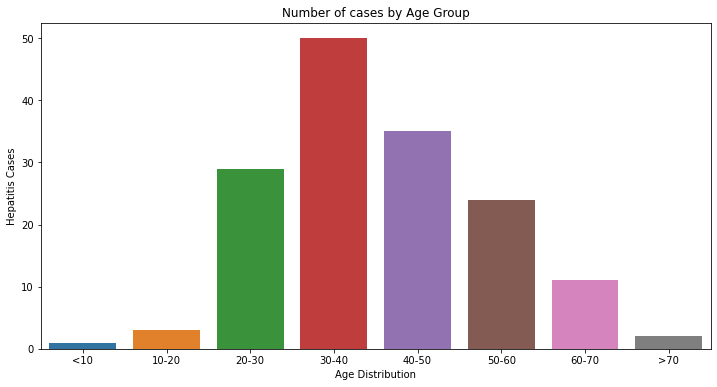

In [39]:
# Plotting the frequency distribution
plt.figure(figsize=(12,6))
sns.barplot(x='age', y='count', data=freq_df)
plt.xlabel('Age Distribution')
plt.ylabel('Hepatitis Cases')
plt.title('Number of cases by Age Group');


<Figure size 864x432 with 0 Axes>

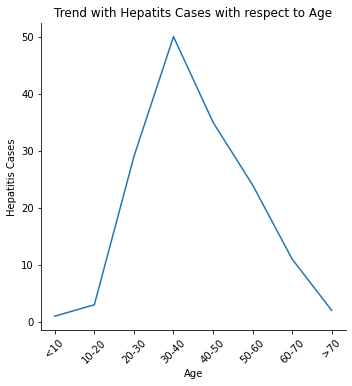

In [40]:
plt.figure(figsize=(12,6))
sns.relplot(x='age', y='count', kind='line', data=freq_df)
plt.xlabel('Age')
plt.ylabel('Hepatitis Cases')
plt.xticks(rotation=45)
plt.title('Trend with Hepatits Cases with respect to Age');

Conclusion:
+ Highest prevalance of Hepatits is from Age 30-40 followed by 40-50
+ The least is in individuals under 10 and above 70

In [41]:
# Checking distribution of all the features:
features = df.columns.tolist()

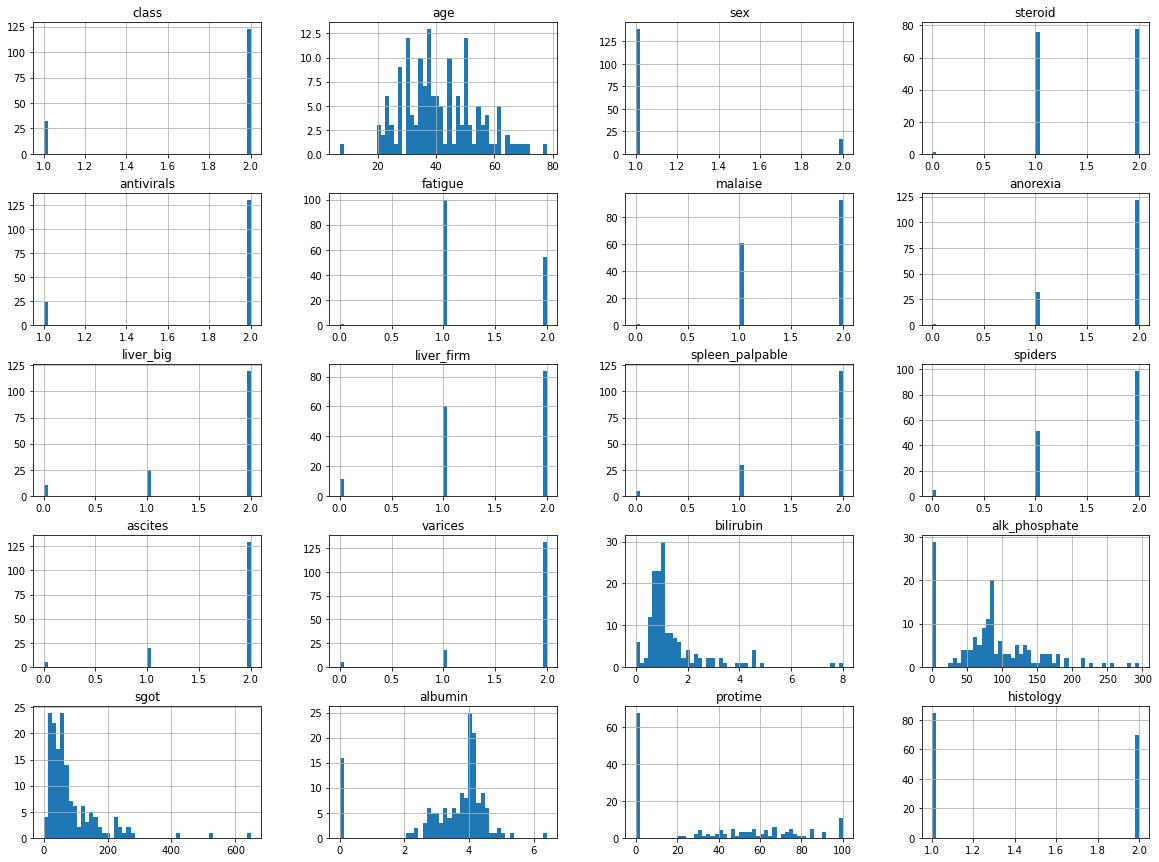

In [42]:
df.hist(bins=50, figsize=(20,15))
plt.show();

### Feature Selection and Importance
We will use three methods to do feature selection and importance:
- SelectKBest
- Recursive Feature Elimination
- Extra Tree Classifier

In [43]:
# SELECTKBEST

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
# Features and labels:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [45]:
# Selecting dependent and independent features

X = df.drop(['class'], axis=1)
y = df['class']

In [46]:
X.shape

(155, 19)

In [47]:
y.shape

(155,)

In [48]:
# Using SelectKBest to get features

skb = SelectKBest(score_func=chi2, k=10)

best_features = skb.fit(X, y)

In [49]:
skb_scores = best_features.scores_

In [50]:
scores_df= pd.DataFrame({'features':X.columns.tolist(), 'score': skb_scores})
scores_df

# The higher the score, more important is the feature

,features,score
0,age,28.474819
1,sex,0.389483
2,steroid,0.399513
3,antivirals,0.186342
4,fatigue,2.346432
5,malaise,2.468032
6,anorexia,0.196481
7,liver_big,0.316982
8,liver_firm,0.986710
9,spleen_palpable,0.745352


In [51]:
# Having a look at the top 10 most important features

scores_df.nlargest(12, 'score')

,features,score
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


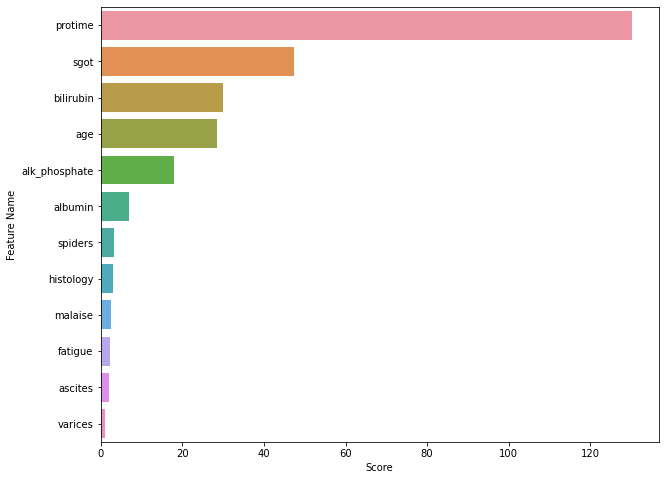

In [52]:
# Plotting the data
plt.figure(figsize=(10,8))
sns.barplot(x='score', y='features', data=scores_df.nlargest(12, 'score'))
plt.xlabel('Score')
plt.ylabel('Feature Name')
plt.show();

In [53]:
# RECURSIVE FEATURE ELIMINATION
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [54]:
logreg = LogisticRegression()

In [55]:
rfe = RFE(estimator=logreg, n_features_to_select=8)

In [56]:
rfe_fit = rfe.fit(X, y)

c:\users\aman ossan\.conda\envs\hepatitis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\aman ossan\.conda\envs\hepatitis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

In [57]:
rfe_fit.ranking_

array([ 8,  1,  5,  9,  1,  1,  1,  4,  6,  7,  1,  2,  3,  1, 11, 10,  1,
       12,  1])

In [58]:
rfe_fit.support_

array([False,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True])

In [59]:
rfe_df = pd.DataFrame({'Selected features': rfe_fit.support_, 'Ranking': rfe_fit.ranking_, 'features': X.columns.tolist()})

# True means we have to eliminate that feature.

In [60]:
rfe_df

,Selected features,Ranking,features
0,False,8,age
1,True,1,sex
2,False,5,steroid
3,False,9,antivirals
4,True,1,fatigue
5,True,1,malaise
6,True,1,anorexia
7,False,4,liver_big
8,False,6,liver_firm
9,False,7,spleen_palpable


Conclusion for RFE-
- We will eliminate the features with lowest ranking or those which are True

In [61]:
# EXTRA TREE CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier

In [62]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X, y)

ExtraTreesClassifier()

In [63]:
# Feature Importance
et_clf.feature_importances_

array([0.05559562, 0.02139408, 0.02669265, 0.00944721, 0.03405634,
       0.05376693, 0.02862682, 0.0372415 , 0.05547521, 0.03770391,
       0.06165304, 0.09750249, 0.04840014, 0.10061419, 0.06765901,
       0.05543151, 0.07334894, 0.06833801, 0.06705239])

In [64]:
# Mapping feature names to the feature importance
ranked_features = pd.Series(et_clf.feature_importances_, index=X.columns)
ranked_features

age                0.055596
sex                0.021394
steroid            0.026693
antivirals         0.009447
fatigue            0.034056
malaise            0.053767
anorexia           0.028627
liver_big          0.037241
liver_firm         0.055475
spleen_palpable    0.037704
spiders            0.061653
ascites            0.097502
varices            0.048400
bilirubin          0.100614
alk_phosphate      0.067659
sgot               0.055432
albumin            0.073349
protime            0.068338
histology          0.067052
dtype: float64

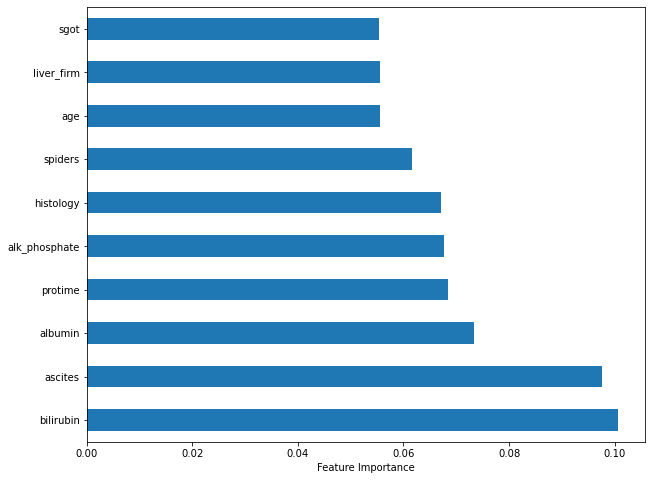

In [65]:
# Plotting the top 10 features
plt.figure(figsize=(10, 8))
ranked_features.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.show();

##### Conclusion:
- All methods gace almost the same features to use 

In [66]:
# CORRELATION

In [67]:
# Checking the correlation between the independent features
X.corr()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632
spleen_palpable,-0.127258,-0.078414,0.071401,-0.183070,0.226850,0.145236,0.185004,0.338963,0.322955,1.000000,0.515462,0.495691,0.574616,-0.178364,-0.160211,-0.116444,0.196297,0.124451,-0.100840


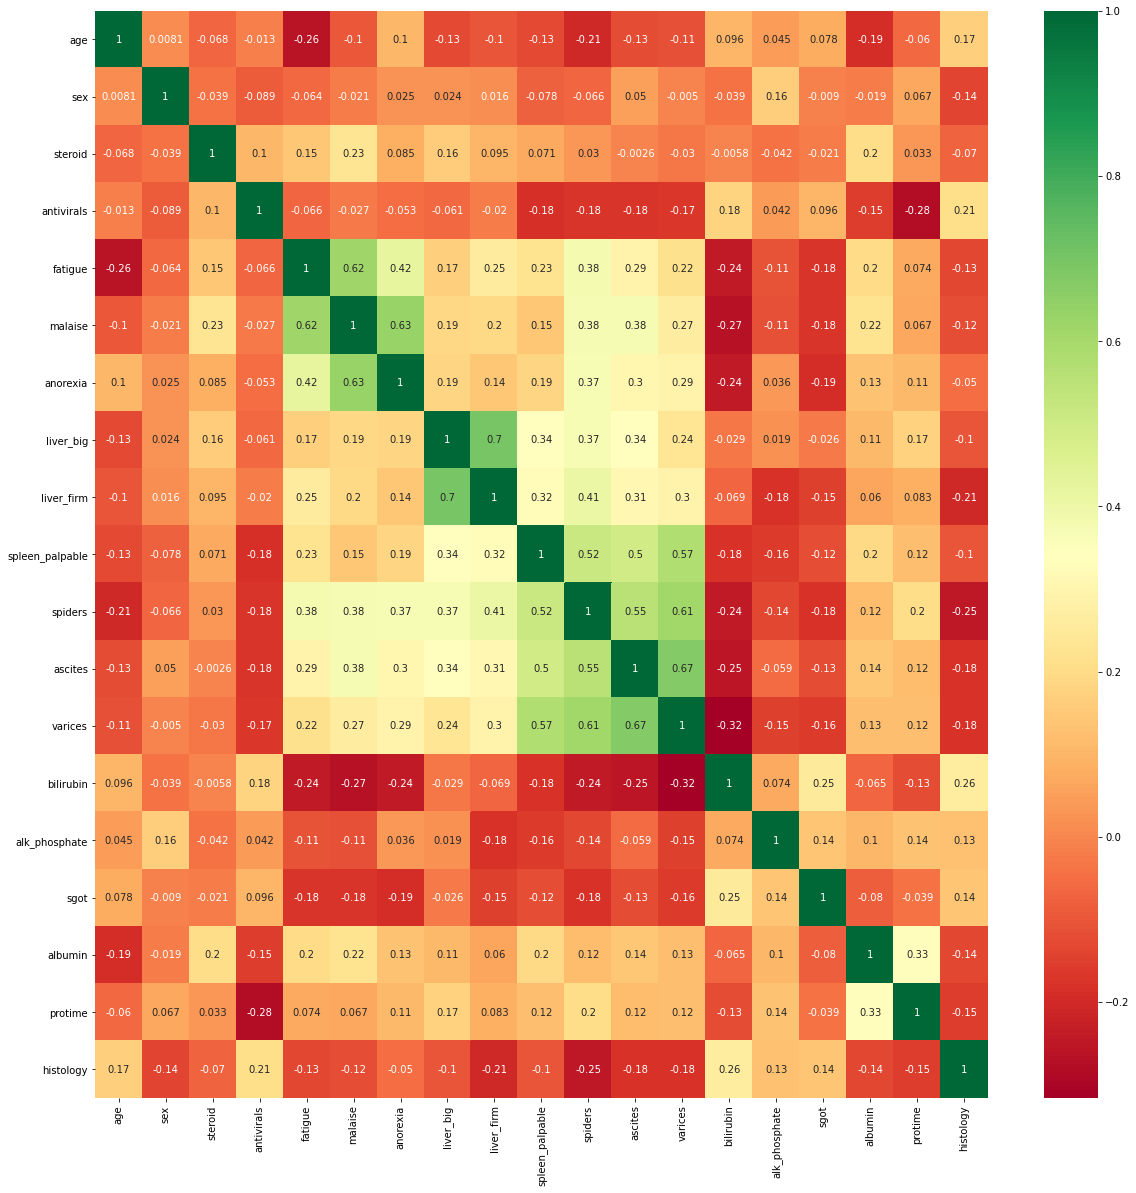

In [68]:
# Now plotting the correlation
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')
plt.show();

## Model Building 
- Logistic Regression
- Random Forest
- Decision Tree

In [69]:
# Importing Machine Learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [70]:
# Features of our Dataset:
X.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [71]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [72]:
# Selecting the top 12 features we got from SELECTKBEST

selected_features = scores_df.nlargest(12, 'score')['features'].tolist()
selected_features

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'malaise',
 'fatigue',
 'ascites',
 'varices']

In [73]:
# We are going to add Sex, Antivirals and Steriod to it 
# We are going to remove malaise from our features since it is quite general

for f in ['sex', 'antivirals', 'steroid']:
    selected_features.append(f)
    
selected_features.remove('malaise')

In [74]:
print(selected_features)
print(len(selected_features))

['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin', 'spiders', 'histology', 'fatigue', 'ascites', 'varices', 'sex', 'antivirals', 'steroid']
14


In [75]:
X_selected_features = df[selected_features]

In [76]:
X_selected_features.head()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,fatigue,ascites,varices,sex,antivirals,steroid
0,0,18,1.0,30,85,4.0,2,1,2,2,2,2,2,1
1,0,42,0.9,50,135,3.5,2,1,1,2,2,1,2,1
2,0,32,0.7,78,96,4.0,2,1,1,2,2,1,2,2
3,80,52,0.7,31,46,4.0,2,1,2,2,2,1,1,0
4,0,200,1.0,34,0,4.0,2,1,2,2,2,1,2,2


In [77]:
# Splitting datasets into training and test dataset
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_selected_features, y, test_size=0.30, random_state=7)

In [78]:
# Splitting dataset with all features:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [79]:
# Viewing shapes of the Training and Test datasets of Best Features

print(f"Shape of training sets: {X_train_b.shape} and {y_train_b.shape}")
print(f"Shape of test sets: {X_test_b.shape} and {y_test_b.shape}")

Shape of training sets: (108, 14) and (108,)
Shape of test sets: (47, 14) and (47,)


In [80]:
print(f"Shape of training sets: {X_train.shape} and {y_train.shape}")
print(f"Shape of test sets: {X_test.shape} and {y_test.shape}")

Shape of training sets: (108, 19) and (108,)
Shape of test sets: (47, 19) and (47,)


##### Building Models:

##### Now we have two sets of features
- Best selected features - 14 features (X_train_b, y_train_b)
- All the features - 19 features (X_train, y_train)

#### LOGISTIC REGRESSION

In [81]:
# Using the selcted best features: 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_b, y_train_b)
model.score(X_test_b, y_test_b)

0.723404255319149

In [82]:
# Using all the features :

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.723404255319149

In [83]:
# Hyperparameter Tuning for LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

In [84]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [85]:
estimator = LogisticRegression()
randomized_logreg = RandomizedSearchCV(estimator=estimator,
                                      param_distributions=params,
                                      cv=5, n_iter=10, verbose=2,
                                      n_jobs=-1, random_state=0)

# fitting RandomizedSearchCV to the training data:
randomized_logreg.fit(X_train_b, y_train_b)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=0, verbose=2)

In [86]:
# Finding the best parameters:
randomized_logreg.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}

In [87]:
# Creating the Final Model with the above paramters:
logreg = LogisticRegression(solver='newton-cg', penalty='l2', C=0.1)
logreg.fit(X_train_b, y_train_b)

LogisticRegression(C=0.1, solver='newton-cg')

In [88]:
# Score:
y_pred = logreg.predict(X_test_b)
print("Accuracy Score: {}".format(accuracy_score(y_test_b, y_pred)))
print("Recall Score: {}".format(recall_score(y_test_b, y_pred)))
print("Precision Score: {}".format(precision_score(y_test_b, y_pred)))
print(f"Confusion Matrix:\n{confusion_matrix(y_test_b, y_pred)}")

Accuracy Score: 0.7021276595744681
Recall Score: 0.07692307692307693
Precision Score: 0.3333333333333333
Confusion Matrix:
[[ 1 12]
 [ 2 32]]


##### Saving our Logistic Regression Model:

In [89]:
with open('Hepatitis App/models/logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

#### K NEAREST NEIGHBOR:

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
# Using the selected features only:

model = KNeighborsClassifier()
model.fit(X_train_b, y_train_b)

KNeighborsClassifier()

In [92]:
# Scores:
print("Training:", model.score(X_train_b, y_train_b))
print("Test:", model.score(X_test_b, y_test_b))

Training: 0.8055555555555556
Test: 0.723404255319149


In [93]:
# Using all the features:

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
# Scores:
print("Training:", model.score(X_train, y_train))
print("Test:", model.score(X_test, y_test))

Training: 0.8055555555555556
Test: 0.723404255319149


Conclusion: Using all the features results in better Test score

In [95]:
# Hyperparamter tuning for KNeighborsClassifier:

params = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'minkowski', 'manhattan']
}

In [96]:
# Creating RandomizedSearchCV object:
estimator = KNeighborsClassifier()
randomized_knn = RandomizedSearchCV(estimator=estimator,
                                   param_distributions=params,
                                   cv=5, n_iter=10, n_jobs=-1,
                                   verbose=2, random_state=0)

randomized_knn.fit(X_train_b, y_train_b)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'minkowski',
                                                   'manhattan'],
                                        'n_neighbors': [3, 5, 10, 15, 20],
                                        'weights': ['uniform', 'distance']},
                   random_state=0, verbose=2)

In [97]:
# Looking at the best parameters:

randomized_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=20)

In [98]:
randomized_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 20, 'metric': 'manhattan'}

In [99]:
# Creating the Final KNN model:
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
knn_clf.fit(X_train_b, y_train_b)

KNeighborsClassifier(metric='manhattan')

In [100]:
# Scores:
y_pred = knn_clf.predict(X_test_b)
print("Accuracy Score:", accuracy_score(y_test_b, y_pred))
print("Recall Score:", recall_score(y_test_b, y_pred))
print("Precision Score:", precision_score(y_test_b, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test_b, y_pred)}")

Accuracy Score: 0.7021276595744681
Recall Score: 0.07692307692307693
Precision Score: 0.3333333333333333
Confusion Matrix:
[[ 1 12]
 [ 2 32]]


##### Saving our KNN model:

In [101]:
with open('Hepatitis App/models/knn_model.pkl', 'wb') as file:
    pickle.dump(knn_clf, file)

#### DECISION TREE CLASSIFIER:

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Using selected features only:

model = DecisionTreeClassifier()
model.fit(X_train_b, y_train_b)

DecisionTreeClassifier()

In [104]:
# Score:
print(f"Training:", model.score(X_train_b, y_train_b))
print(f"Test:", model.score(X_test_b, y_test_b))

Training: 1.0
Test: 0.7659574468085106


In [105]:
# Using all the features:

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
# Score:
print(f"Training:", model.score(X_train, y_train))
print(f"Test:", model.score(X_test, y_test))

Training: 1.0
Test: 0.7872340425531915


Conclusion: Right now, we are over fitting.

In [107]:
# Hyperparameter tuning for DecisionTreeClassifier:

params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2, 3, 5, 6, 7],
    'min_samples_leaf': [1,2,4,6,8]
}

In [108]:
# Creating our RandomizedSearchCV oobject
estimator = DecisionTreeClassifier()

randomized_dt = RandomizedSearchCV(estimator=estimator,
                                  param_distributions=params,
                                  cv=5, n_iter=10, verbose=2,
                                  n_jobs=-1, random_state=0)

randomized_dt.fit(X_train_b, y_train_b)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 6, 7]},
                   random_state=0, verbose=2)

In [109]:
randomized_dt.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 670,
 'criterion': 'entropy'}

In [110]:
randomized_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=670, max_features='auto',
                       min_samples_leaf=6, min_samples_split=3)

In [111]:
# Creating our final DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='entropy',
                               max_depth=890,
                               max_features='sqrt',
                               min_samples_leaf=2,
                               min_samples_split=6)
dt_clf.fit(X_train_b, y_train_b)

DecisionTreeClassifier(criterion='entropy', max_depth=890, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=6)

In [112]:
# Scores:
y_pred = dt_clf.predict(X_test_b)
print("Accuracy Score:", accuracy_score(y_test_b, y_pred))
print("Recall Score:", recall_score(y_test_b, y_pred))
print("Precision Score:", precision_score(y_test_b, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test_b, y_pred)}")

Accuracy Score: 0.851063829787234
Recall Score: 0.6153846153846154
Precision Score: 0.8
Confusion Matrix:
[[ 8  5]
 [ 2 32]]


##### Saving our Decision Tree model:

In [113]:
with open('Hepatitis App/models/dt_model.pkl', 'wb') as file:
    pickle.dump(dt_clf, file)

In [114]:
# PLotting our DecisionTree Model
from sklearn.tree import plot_tree

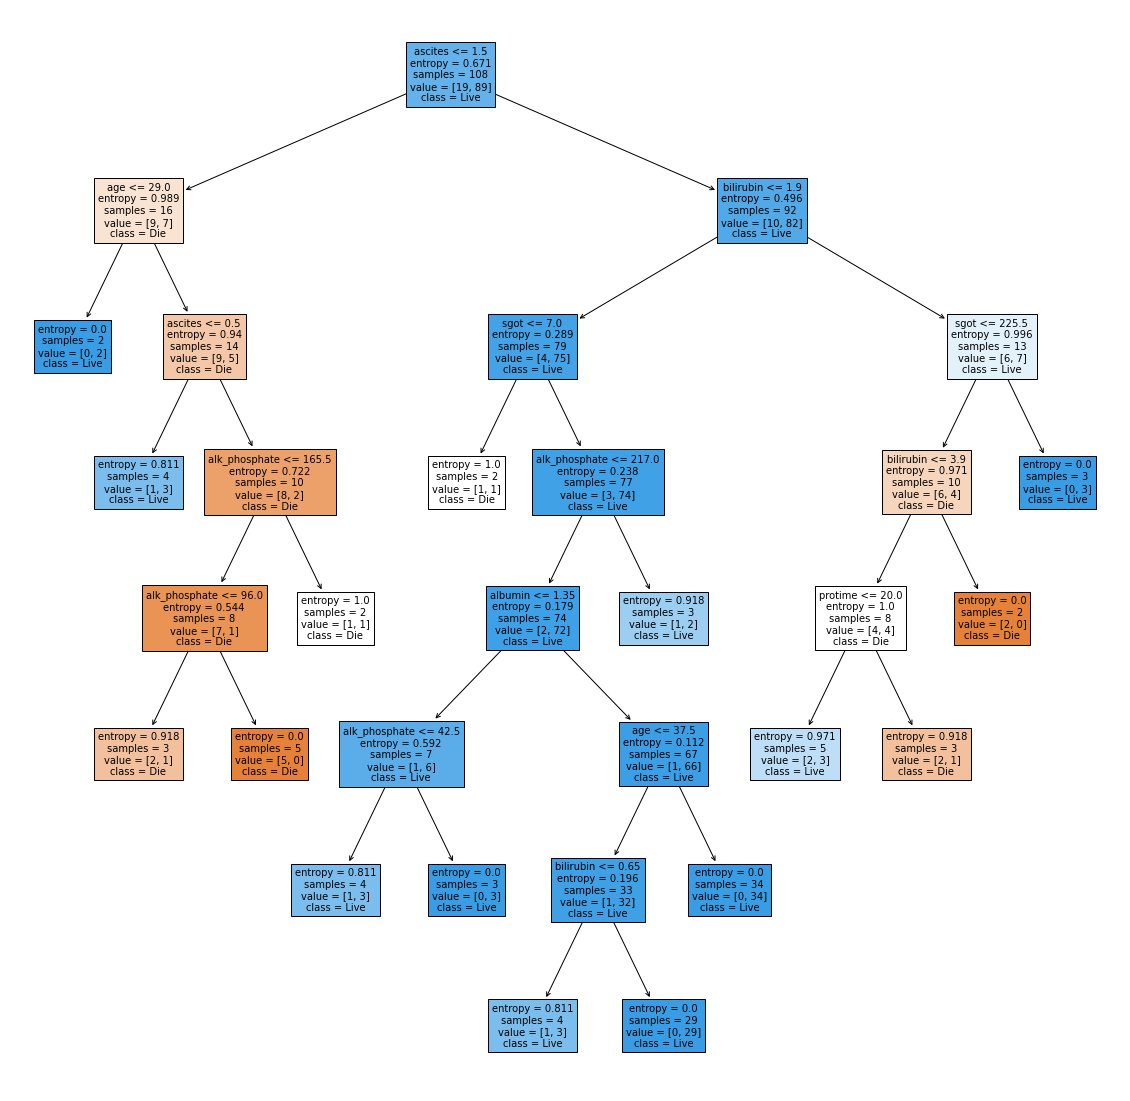

In [115]:
# Visualizing :
fig = plt.figure(figsize=(20,20))
_ = plot_tree(dt_clf,
             feature_names=X_selected_features.columns,
             class_names=list(target_label.keys()),
             filled=True)

In [116]:
list(target_label.keys())

['Die', 'Live']

In [117]:
# Saving the plot.
fig.savefig("decistion_tree.png")

#### RANDOM FOREST CLASSIFIER:

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
# Using best selected features:

model = RandomForestClassifier()
model.fit(X_train_b, y_train_b)

RandomForestClassifier()

In [120]:
# Scores:

print("Training:", model.score(X_train_b, y_train_b))
print("Test:", model.score(X_test_b, y_test_b))

Training: 1.0
Test: 0.8085106382978723


In [121]:
# Using all the features:

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [122]:
# Scores:

print("Training:", model.score(X_train, y_train))
print("Test:", model.score(X_test, y_test))

Training: 1.0
Test: 0.8085106382978723


Conclusion - Model is overfitting at the moment

In [123]:
# Hyperparameter tuning for RandomForestClassifier:

params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [int(x) for x in np.linspace(200, 2000, 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2, 3, 5, 6, 7],
    'min_samples_leaf': [1,2,4,6,8]
}

In [124]:
# Creating randomizedSearchCV object:
estimator = RandomForestClassifier()

randomized_rf = RandomizedSearchCV(estimator=estimator,
                                  param_distributions=params,
                                  cv=5, n_iter=10, verbose=2,
                                  n_jobs=-1, random_state=0)

randomized_rf.fit(X_train_b, y_train_b)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 6, 7],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [125]:
randomized_rf.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'gini'}

In [126]:
randomized_rf.best_estimator_

RandomForestClassifier(max_depth=670, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=2000)

In [127]:
# Creating our RandomForestClassifier model
rf_clf = RandomForestClassifier(max_depth=560, max_features='log2', min_samples_split=2,
                       n_estimators=800, min_samples_leaf=4)

rf_clf.fit(X_train_b, y_train_b)

RandomForestClassifier(max_depth=560, max_features='log2', min_samples_leaf=4,
                       n_estimators=800)

In [128]:
# Score:
y_pred = rf_clf.predict(X_test_b)
print("Accuracy:", accuracy_score(y_test_b, y_pred))
print("Recall:", recall_score(y_test_b, y_pred))
print("Precission:", precision_score(y_test_b, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test_b, y_pred)}")

Accuracy: 0.7659574468085106
Recall: 0.15384615384615385
Precission: 1.0
Confusion Matrix:
[[ 2 11]
 [ 0 34]]


##### Saving our RandomForestClassifier model:

In [129]:
with open('Hepatitis App/models/rf_model.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

### Interpreting and Evaluating our Models:

#### Interpreting with Lime

In [130]:
from lime.lime_tabular import LimeTabularExplainer

In [131]:
# Creating lime explainer
feature_names_best = X_selected_features.columns.tolist()

class_names = ['Die(1)', 'Live(2)']

explainer = LimeTabularExplainer(X_train_b.values, feature_names=feature_names_best,
                                class_names=class_names,
                                discretize_continuous=True)

In [132]:
# Testing the explainer 

x1 = X_test_b.iloc[1].values

In [151]:
x1

array([  0. , 242. ,   2. ,  58. , 167. ,   3.3,   1. ,   1. ,   1. ,
         2. ,   2. ,   1. ,   2. ,   2. ])

In [142]:
probability = logreg.predict_proba(x1.reshape(1,-1))

In [143]:
print(probability)
print(probability[0][1])
print(probability[0][0])

[[0.25511466 0.74488534]]
0.7448853414061153
0.2551146585938847


In [134]:
logreg.predict(x1.reshape(1,-1))

array([2], dtype=int64)

Our Logistic Regression Model predicts that the patient is going to live, lets check why:

In [135]:
exp = explainer.explain_instance(x1, logreg.predict_proba, num_features=14, top_labels=1)

In [144]:
exp.show_in_notebook(show_table=True, show_all=False)

In [137]:
# Explanation as list :
exp.as_list()

[('bilirubin > 1.50', -0.3251943516223624),
 ('alk_phosphate > 119.25', -0.09123218971813123),
 ('sex <= 1.00', -0.0593838071294807),
 ('sgot > 90.50', 0.0522381657805367),
 ('age > 50.25', -0.04687356467238796),
 ('spiders <= 1.00', -0.04611793973516935),
 ('histology <= 1.00', 0.02951513144322716),
 ('2.98 < albumin <= 4.00', 0.023757835854115256),
 ('1.50 < steroid <= 2.00', 0.016774977774273305),
 ('protime <= 0.00', -0.009312127516678845),
 ('fatigue <= 1.00', -0.004843562049956658),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0),
 ('antivirals <= 2.00', 0.0)]

In [146]:
ls = exp.as_list()

In [149]:
[i[0] for i in ls]

['bilirubin > 1.50',
 'alk_phosphate > 119.25',
 'sex <= 1.00',
 'sgot > 90.50',
 'age > 50.25',
 'spiders <= 1.00',
 'histology <= 1.00',
 '2.98 < albumin <= 4.00',
 '1.50 < steroid <= 2.00',
 'protime <= 0.00',
 'fatigue <= 1.00',
 'ascites <= 2.00',
 'varices <= 2.00',
 'antivirals <= 2.00']

In [150]:
[i[1] for i in ls]

[-0.3251943516223624,
 -0.09123218971813123,
 -0.0593838071294807,
 0.0522381657805367,
 -0.04687356467238796,
 -0.04611793973516935,
 0.02951513144322716,
 0.023757835854115256,
 0.016774977774273305,
 -0.009312127516678845,
 -0.004843562049956658,
 0.0,
 0.0,
 0.0]

##### Interpreting with Eli5:

In [138]:
import eli5

c:\users\aman ossan\.conda\envs\hepatitis\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\aman ossan\.conda\envs\hepatitis\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [139]:
# Looking at how each feature contributes
eli5.show_weights(logreg, top=10, feature_names=feature_names_best, target_names=class_names)

In [140]:
eli5.show_prediction(logreg, x1, feature_names=feature_names_best, target_names=class_names)

In [141]:
X_train_b.columns.tolist()

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'fatigue',
 'ascites',
 'varices',
 'sex',
 'antivirals',
 'steroid']